Accuracy for CADD: 0.99


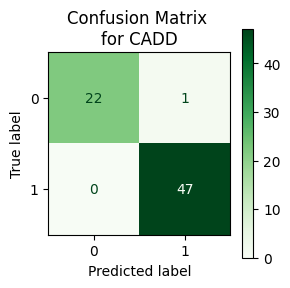

Accuracy for AlphaMissense: 0.91


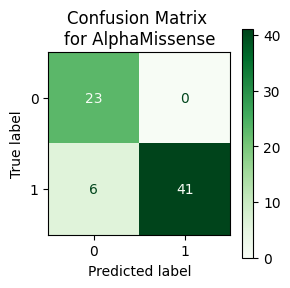

Accuracy for ESM-1b: 0.83


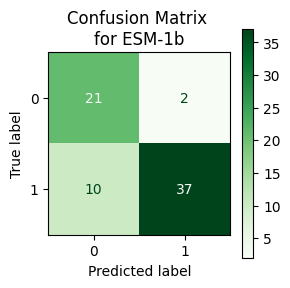

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/testset_unique_annotation.csv')

# Map patho to binary labels
patho_mapping = {"Benign": 0, "Likely benign": 0, "Pathogenic": 1, "Likely pathogenic": 1}
df["patho_binary"] = df["patho"].map(patho_mapping)

# Function to calculate accuracy and plot confusion matrix + ROC curve
def evaluate_predictions(df, predictors, true_label_col, figsize=(3, 3)):
    for predictor in predictors:
        # Accuracy calculation
        accuracy = accuracy_score(df[true_label_col], df[predictor])
        print(f"Accuracy for {predictor}: {accuracy:.2f}")
        
        # Confusion matrix
        cm = confusion_matrix(df[true_label_col], df[predictor])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        fig, ax = plt.subplots(figsize=figsize)
        disp.plot(ax=ax, cmap="Greens", values_format="d")
        ax.set_title(f"Confusion Matrix \nfor {predictor}")

        plt.tight_layout()
        plt.savefig('images/cm-' + predictor + '.png',dpi=300)
        plt.show()

# Define predictors and true label column
predictors = ["CADD", "AlphaMissense", "ESM-1b"]
true_label_col = "patho_binary"

# Evaluate predictions with adjustable figure size
evaluate_predictions(df, predictors, true_label_col, figsize=(3, 3))